# Projet Machine learning

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import re
from pandas_ods_reader import read_ods

In [2]:
con = sqlite3.connect("./data/database.sqlite")
#Country = pd.read_sql_query("SELECT * from Country", con)
League = pd.read_sql_query("SELECT * from League", con)
Match = pd.read_sql_query("SELECT * from Match", con)
Player = pd.read_sql_query("SELECT * from Player", con)
Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
Team = pd.read_sql_query("SELECT * from Team", con)
Team_Attributes = pd.read_sql_query("SELECT * from Team_Attributes", con)
player_csv = pd.read_csv('./data/data.csv')

con.close()

# visualisation des missing values

In [3]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [5]:
player_csv.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
player_csv.describe(include=np.object)

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,...,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/246085.png,England,https://cdn.sofifa.org/flags/14.png,Southampton,https://cdn.sofifa.org/teams/2/light/111657.png,€1.1M,€1K,Right,Medium/ Medium,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,...,660,660,660,713,669,634,634,634,669,557


In [7]:
type(player_csv['Release Clause'][0])

str

il est possible de merge player_csv avec player grace aux attribues player_csv.id et player.player_fifa_api_id

# drop columns

In [8]:
player_csv.drop(columns=['Photo','Flag','Club Logo','Jersey Number','Real Face'],inplace=True)

# cleaning data

récupérer le club fifa api id en faisant un jointure entre player_csv et player 

In [9]:
player_csv['Release Clause'] = player_csv['Release Clause'].fillna(0)
player_csv['Value']  = player_csv['Value'].fillna(0)
player_csv['Wage'] = player_csv['Wage'].fillna(0)

In [10]:

# certaines colones sont au format string et d'autres sont au format float 
player_csv['Release Clause'] = player_csv['Release Clause'].astype(str)
player_csv['Value'] = player_csv['Value'].astype(str)
player_csv['Wage'] = player_csv['Wage'].astype(str)


In [11]:
player_csv['Release Clause format'] = player_csv['Release Clause'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
player_csv['Value format'] = player_csv['Value'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
player_csv['Wage format'] = player_csv['Wage'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [12]:
player_csv['Release Clause format'].unique()

array(['€.M', '€M', '', '€K'], dtype=object)

In [13]:
player_csv['Value format'].unique()

array(['€.M', '€M', '€', '€K'], dtype=object)

In [14]:
player_csv['Wage format'].unique()

array(['€K', '€'], dtype=object)

In [15]:
def format_money(x):
    if((len(re.findall('\d+.\d+',str(x)))==0)and(len(re.findall('\d+',str(x)))==0)):
        return x
    frm = ''.join([i for i in x if not i.isdigit()])
    if (len(re.findall('\d+.\d+',str(x)))==0):
        val = float(re.findall('\d+',str(x))[0])
    else :
        val = float(re.findall('\d+.\d+',str(x))[0])
        
    if ((frm == "€.M") or (frm == "€M")):
        return val * 1000000
    elif (frm == "€K") :
        return val * 1000
    else :
        return val
        

reformater le format de la collone en float

In [16]:
player_csv['Release Clause'] = player_csv['Release Clause'].apply(lambda x: format_money(x) if len(x) != 0 else x)
player_csv['Value'] = player_csv['Value'].apply(lambda x: format_money(x) if len(x) != 0 else x )
player_csv['Wage'] = player_csv['Wage'].apply(lambda x: format_money(x) if len(x) != 0 else x )

In [17]:
player_csv['Release Clause'][318]

3000000.0

In [18]:
player_csv['Release Clause'] = pd.to_numeric(player_csv['Release Clause'])
player_csv['Value'] = pd.to_numeric(player_csv['Value'])
player_csv['Wage'] = pd.to_numeric(player_csv['Wage'])

simplifier le systéme de position

In [19]:
defending_position = ['RWB','LWB','RB','LB','CB','LCB','RCB']
midefield_position = ['RCM','LCM','LDM','CAM','RM','LAM','LM','RDM','RAM','CDM','CM']
attaking_position = ['CF','RF','LF','RS','LS','RW','LW','ST']

In [20]:
def get_position(x):
    if (x in defending_position) :
        return 'defense'
    elif (x in midefield_position):
        return 'midle'
    elif (x in attaking_position) :
        return 'attak'
    elif (x == 'GK'):
        return 'goalkeeper'
    else :
        return x

In [21]:
player_csv['Position_simp'] = player_csv['Position'].apply(lambda x: get_position(x))

In [22]:
player_csv['Position_simp'].unique()

array(['attak', 'goalkeeper', 'midle', 'defense', nan], dtype=object)

remplacer les valeurs Nan par 0

# explore data

In [23]:
clubs_players_relaise_clause = player_csv[['Club','Release Clause']].groupby('Club').sum()
clubs_players_value = player_csv[['Club','Value']].groupby('Club').sum()
clubs_players_wage = player_csv[['Club','Wage']].groupby('Club').sum()

In [24]:
clubs_players_wage.sort_values(by='Wage',ascending=False).head(10)

,Wage
Club,
Real Madrid,5017000.0
FC Barcelona,4837000.0
Manchester City,3741000.0
Manchester United,3391000.0
Juventus,3292000.0
Chelsea,3249000.0
Liverpool,2902000.0
Tottenham Hotspur,2623000.0
Arsenal,2588000.0


In [25]:
clubs_players_value.sort_values(by='Value',ascending=False).head(10)

,Value
Club,
Real Madrid,874425000.0
FC Barcelona,852600000.0
Manchester City,786555000.0
Juventus,704475000.0
FC Bayern München,679025000.0
Atlético Madrid,644525000.0
Paris Saint-Germain,625325000.0
Tottenham Hotspur,618450000.0
Chelsea,606815000.0


In [26]:
clubs_players_relaise_clause.sort_values(by="Release Clause",ascending=False)

,Release Clause
Club,
Real Madrid,1.857688e+09
FC Barcelona,1.813000e+09
Manchester City,1.512907e+09
Atlético Madrid,1.375649e+09
Paris Saint-Germain,1.216266e+09
...,...
Bohemian FC,5.633000e+06
Sangju Sangmu FC,5.171000e+06
Derry City,4.703000e+06


In [27]:
player_csv.sort_values(by = "Value",ascending=False)

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release Clause format,Value format,Wage format,Position_simp
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,...,9.0,9.0,15.0,15.0,11.0,228100000.0,€.M,€.M,€K,attak
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,...,6.0,11.0,15.0,14.0,8.0,226500000.0,€.M,€.M,€K,attak
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,...,15.0,13.0,5.0,10.0,13.0,196400000.0,€.M,€M,€K,midle
5,5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,...,11.0,12.0,6.0,8.0,8.0,172100000.0,€.M,€M,€K,attak
15,15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,...,5.0,4.0,4.0,5.0,8.0,153500000.0,€.M,€M,€K,attak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,4298,225900,J. Sambenito,26,Paraguay,71,74,NaN,0.0,0.0,...,15.0,16.0,15.0,7.0,7.0,0.0,,€,€,attak
8605,8605,190939,S. Chhetri,33,India,67,67,NaN,0.0,0.0,...,10.0,7.0,11.0,9.0,10.0,0.0,,€,€,attak
4274,4274,201572,M. Korhut,29,Hungary,71,71,NaN,0.0,0.0,...,14.0,15.0,7.0,11.0,12.0,0.0,,€,€,defense
4257,4257,225884,J. Riojas,30,Paraguay,71,71,NaN,0.0,0.0,...,13.0,13.0,11.0,10.0,16.0,0.0,,€,€,midle


<AxesSubplot:ylabel='Frequency'>

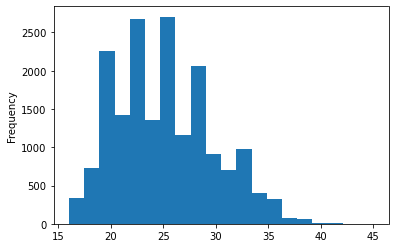

In [28]:
player_csv['Age'].plot.hist(bins=20)

In [29]:
player_csv[['Age','Potential','Overall','Value','Wage','Release Clause']].head()

,Age,Potential,Overall,Value,Wage,Release Clause
0,31,94,94,110500000.0,565000.0,226500000.0
1,33,94,94,77000000.0,405000.0,127100000.0
2,26,93,92,118500000.0,290000.0,228100000.0
3,27,93,91,72000000.0,260000.0,138600000.0
4,27,92,91,102000000.0,355000.0,196400000.0


<AxesSubplot:>

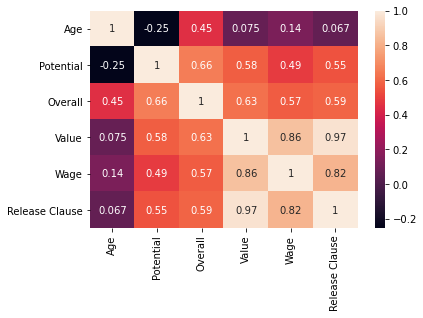

In [30]:
sns.heatmap(player_csv[['Age','Potential','Overall','Value','Wage','Release Clause']].corr(),annot=True)

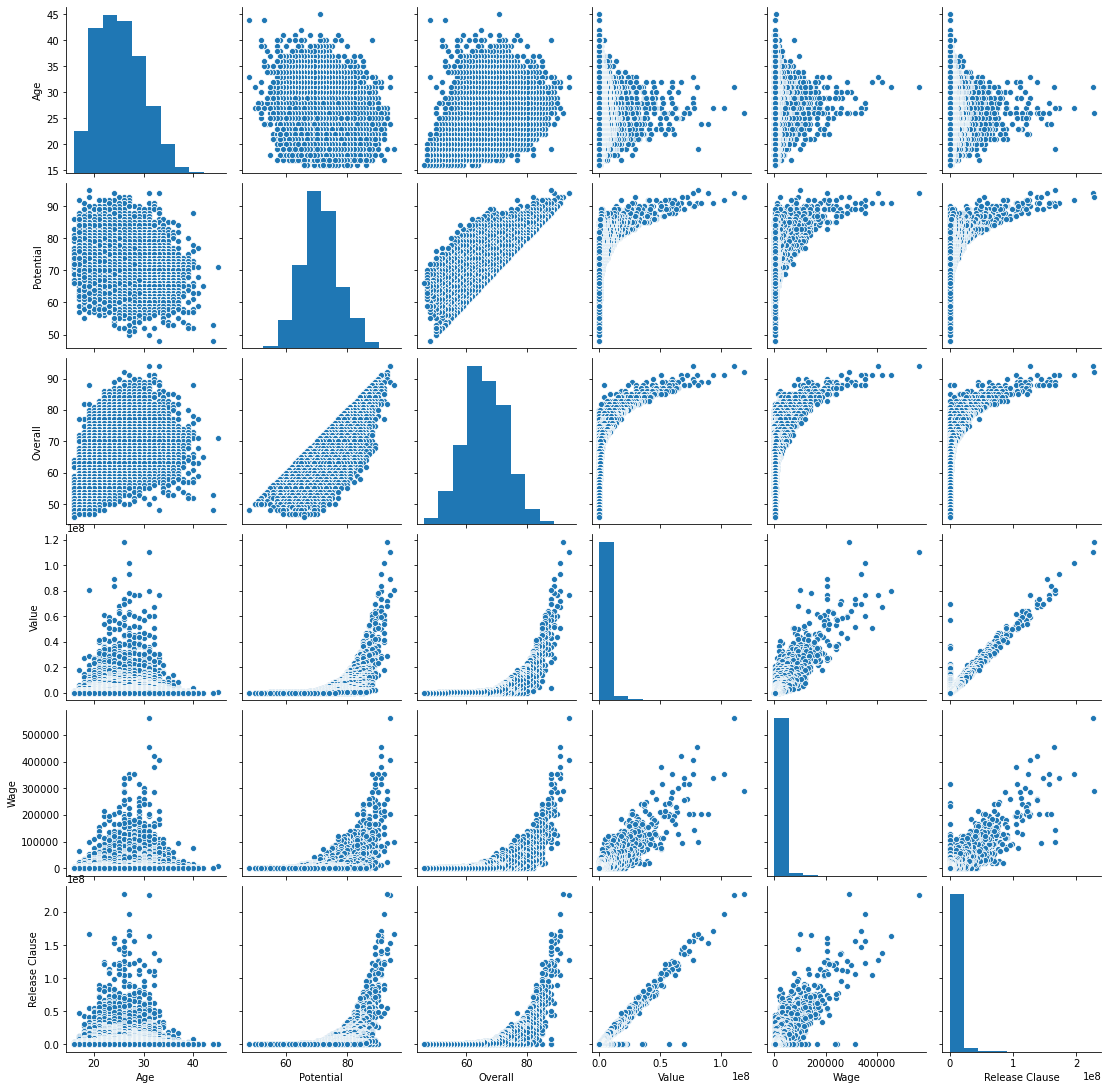

In [31]:
sns.pairplot(player_csv[['Age','Potential','Overall','Value','Wage','Release Clause']])

note : récupérer l'investissement des clubs sur des joueurs (déf , milieu , att) et voir le ration match gagné et perdu ainsi que le nombre de buts consedée et marqué

In [32]:
player_csv[['Position_simp','Value']].groupby(['Position_simp']).mean().sort_values(by='Value',ascending=False)

,Value
Position_simp,
attak,2.984156e+06
midle,2.760639e+06
defense,1.975138e+06
goalkeeper,1.585815e+06


In [33]:
position_investissement = player_csv[['Club','Position_simp','Value']].groupby(['Club','Position_simp']).sum().sort_values(by='Value',ascending=False)

In [34]:
position_investissement.head(20)

,,Value
Club,Position_simp,
FC Bayern München,midle,362050000.0
Liverpool,midle,358300000.0
FC Barcelona,attak,346575000.0
Atlético Madrid,midle,338425000.0
Manchester City,attak,325600000.0
Paris Saint-Germain,midle,318550000.0
Tottenham Hotspur,midle,294500000.0
Real Madrid,attak,292200000.0
Borussia Dortmund,midle,257300000.0


récupérer les pays qui ont le plus de bons joueurs

<AxesSubplot:xlabel='Nationality'>

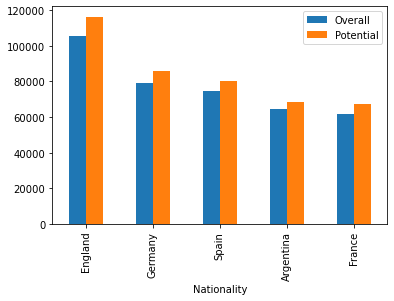

In [35]:
player_csv[['Nationality','Overall','Potential']].groupby(['Nationality']).sum().sort_values(by=['Overall','Potential'],ascending=False).head().plot.bar()

In [36]:
player_csv['Age'].unique()

array([31, 33, 26, 27, 32, 25, 29, 28, 24, 30, 19, 40, 22, 23, 34, 35, 36,
       37, 21, 18, 20, 39, 41, 17, 38, 45, 42, 16, 44])

récupérer les pays qui ont le plus de jeunes talons 

In [37]:
Match.columns.to_list()

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [38]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


récupérer le gagnnt du match

In [39]:
Match[['home_team_goal','away_team_goal']].dtypes

home_team_goal    int64
away_team_goal    int64
dtype: object

In [40]:
Match['Winner'] = 0

In [41]:
Match['Winner'][Match['home_team_goal']>Match['away_team_goal']] = 1
Match['Winner'][Match['home_team_goal']<Match['away_team_goal']] = 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
